# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.009619e+01     7.187708e+00
 * time: 0.0018448829650878906
     1     2.216245e+01     4.079396e+00
 * time: 0.009734869003295898
     2     1.563511e+01     3.086069e+00
 * time: 0.017550945281982422
     3     1.212911e+01     2.017179e+00
 * time: 0.025368928909301758
     4     1.016421e+01     1.144036e+00
 * time: 0.03299093246459961
     5     9.520074e+00     1.694598e+00
 * time: 0.039433956146240234
     6     9.060000e+00     1.133705e+00
 * time: 0.04581594467163086
     7     8.721657e+00     8.261592e-01
 * time: 0.05216193199157715
     8     8.473522e+00     9.497790e-01
 * time: 0.08563089370727539
     9     8.288272e+00     5.655388e-01
 * time: 0.09024405479431152
    10     8.166294e+00     5.245667e-01
 * time: 0.09471893310546875
    11     8.054974e+00     3.794378e-01
 * time: 0.09913206100463867
    12     8.054416e+00     7.431031e-01
 * time: 0.10263991355895996
    13     8.004938e+00     6.878052e-01
 *

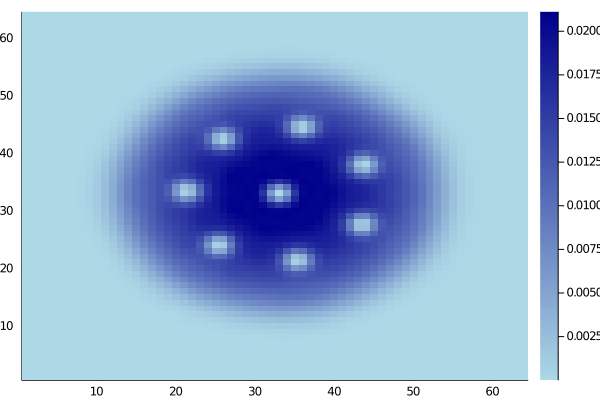

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)